In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Processed PartMC_train.csv: 0 NaNs found.
Processed PartMC_unlabeled.csv: 0 NaNs found.
Processed PartMC_valid.csv: 0 NaNs found.
Processed PartMC_data.csv: 0 NaNs found.
Processed PartMC_labeled.csv: 0 NaNs found.
Processed PartMC_test.csv: 0 NaNs found.


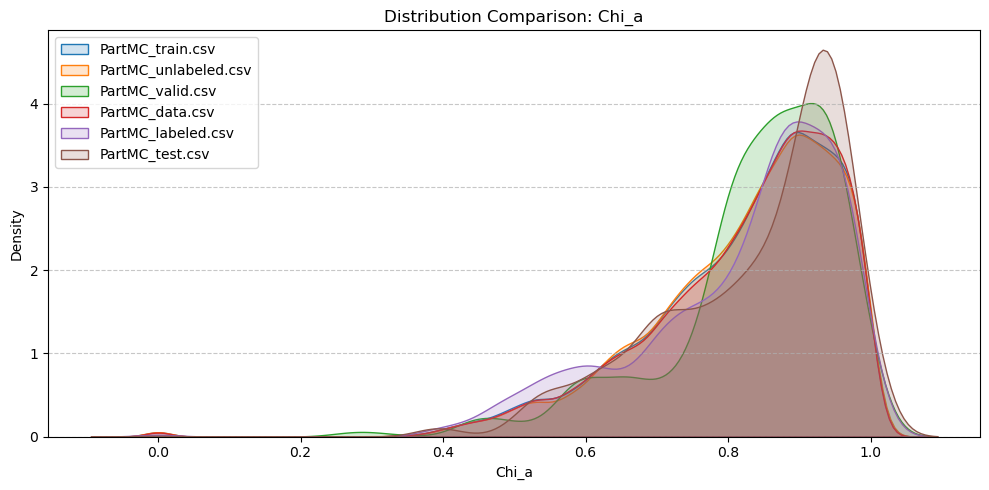

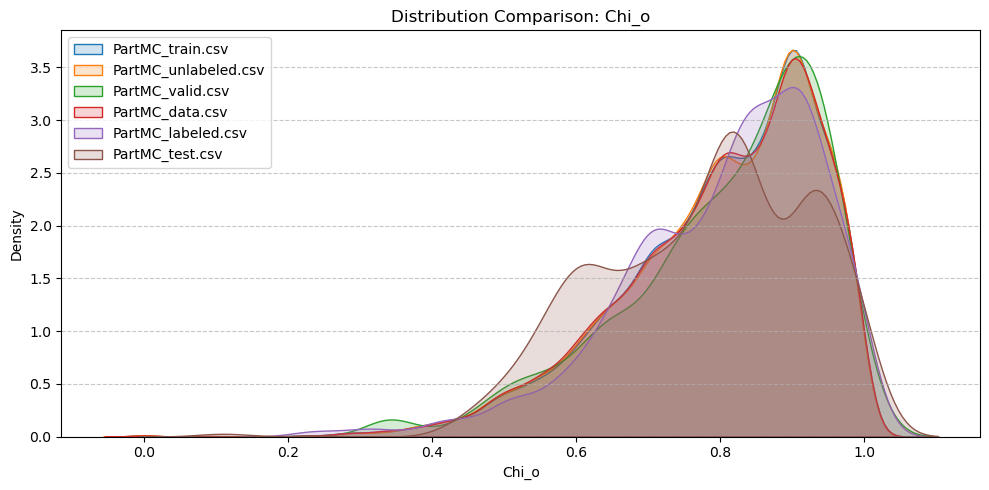


Final Summary Table:
                   File  Total NaNs   Rows
0      PartMC_train.csv           0  22500
1  PartMC_unlabeled.csv           0  20000
2      PartMC_valid.csv           0   1250
3       PartMC_data.csv           0  25000
4    PartMC_labeled.csv           0   2500
5       PartMC_test.csv           0   1250


In [2]:
# List of files to check
csv_files = [
    'PartMC_train.csv', 'PartMC_unlabeled.csv', 'PartMC_valid.csv', 
    'PartMC_data.csv', 'PartMC_labeled.csv', 'PartMC_test.csv'
]

def analyze_datasets(file_list):
    summary = []
    # Key features to plot
    key_features = ['Chi_a', 'Chi_o']
    
    for file in file_list:
        if not os.path.exists(file):
            continue
        
        df = pd.read_csv(file)
        
        # Check for NaNs
        nan_count = df.isna().sum().sum()
        summary.append({
            'File': file, 
            'Total NaNs': nan_count, 
            'Rows': len(df)
        })
        
        print(f"Processed {file}: {nan_count} NaNs found.")

    # Plotting Distributions for Key Features
    for feature in key_features:
        plt.figure(figsize=(10, 5))
        for file in file_list:
            df = pd.read_csv(file)
            if feature in df.columns:
                sns.kdeplot(df[feature], label=file, fill=True, alpha=0.2)
        
        plt.title(f'Distribution Comparison: {feature}')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    return pd.DataFrame(summary)

# Run analysis
status_df = analyze_datasets(csv_files)
print("\nFinal Summary Table:")
print(status_df)